In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

In [50]:
#Загрузка данных
data = yf.download('NVDA', start='2020-01-01', end='2024-01-01')
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['Volatility'] = data['High'] - data['Low']
data['Price_Change'] = data['Close'].diff()
data.fillna(data.bfill(),inplace=True)
data.fillna(data.ffill(), inplace=True)

[*********************100%***********************]  1 of 1 completed


In [51]:
#Нормировка данных
features = ['SMA_10', 'SMA_20', 'EMA_10', 'Volatility', 'Price_Change', 'Close']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

In [52]:
scaled_data

array([[0.01290293, 0.00504686, 0.01043274, 0.00477629, 0.22440588,
        0.02390712],
       [0.01290293, 0.00504686, 0.01003146, 0.00800052, 0.22440588,
        0.02179719],
       [0.01290293, 0.00504686, 0.0098066 , 0.02155342, 0.23682994,
        0.02234115],
       ...,
       [0.99403997, 0.99509637, 0.99453971, 0.12782881, 0.24848245,
        0.97819731],
       [0.99731958, 0.99673566, 0.99754287, 0.09845366, 0.24508694,
        0.98050504],
       [1.        , 1.        , 1.        , 0.28330102, 0.23428341,
        0.98050504]])

In [53]:
X = scaled_data[:,:-1]
y = scaled_data[:,-1]

In [54]:
X

array([[0.01290293, 0.00504686, 0.01043274, 0.00477629, 0.22440588],
       [0.01290293, 0.00504686, 0.01003146, 0.00800052, 0.22440588],
       [0.01290293, 0.00504686, 0.0098066 , 0.02155342, 0.23682994],
       ...,
       [0.99403997, 0.99509637, 0.99453971, 0.12782881, 0.24848245],
       [0.99731958, 0.99673566, 0.99754287, 0.09845366, 0.24508694],
       [1.        , 1.        , 1.        , 0.28330102, 0.23428341]])

In [55]:
y

array([0.02390712, 0.02179719, 0.02234115, ..., 0.97819731, 0.98050504,
       0.98050504])

Text(0.5, 0, 'Время')

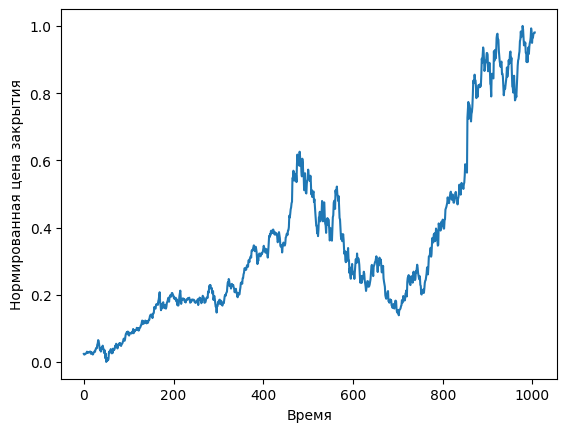

In [56]:
#График цен
plt.plot(y)
plt.ylabel("Нормированная цена закрытия")
plt.xlabel("Время")

Text(0, 0.5, 'Гистограмма изменений цены')

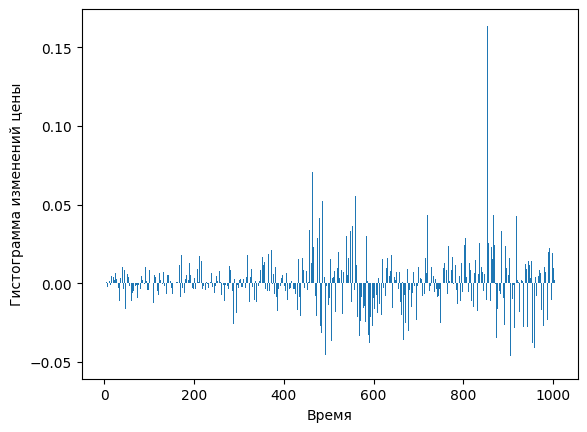

In [58]:
#Гистограмма изменения цен
diffs = [y[i] - y[i-1] for i in range(1,len(y))]
time = [i for i in range(len(diffs))]
plt.bar(time,diffs)
plt.xlabel("Время")
plt.ylabel("Гистограмма изменений цены")

Text(0, 0.5, 'График скользящего среднего')

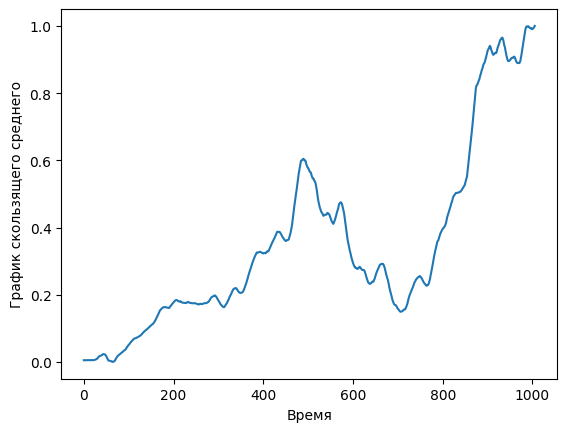

In [59]:
plt.plot(X[:,1])
plt.xlabel("Время")
plt.ylabel("График скользящего среднего")

In [ ]:
def linear_model(X,y):
#Добавим столбец единиц
